In [61]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import textblob
from textblob import TextBlob
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import nltk
import re
classifier = pipeline(model="distilbert-base-uncased-finetuned-sst-2-english")





In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
import pandas as pd

# Sample text data
corpus = ["Text text text text text document 1.", "Another text document. text text text text", "More text text data.", "Yet text another document."]

# TF-IDF vectorization
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(corpus)

# Apply SVD for dimensionality reduction
n_components = 2  # Number of components (topics)
svd = TruncatedSVD(n_components=n_components)
lsa_matrix = svd.fit_transform(tfidf_matrix)

# Get the singular vectors (features)
feature_names = vectorizer.get_feature_names_out()

# Create a DataFrame to display the features and their importance
features_df = pd.DataFrame(svd.components_, index=['Topic 1', 'Topic 2'], columns=feature_names)

# Display the DataFrame
print("Features in LSA Matrix:")
print(features_df)


Features in LSA Matrix:
          another      data  document      more      text       yet
Topic 1  0.222390  0.147612  0.262283  0.147612  0.902266  0.155201
Topic 2  0.462892 -0.391149  0.346087 -0.391149 -0.184892  0.570767


In [56]:
df = pd.read_csv("trainclean1.csv")

In [57]:
saveddf = df

In [58]:
df['label'] = df['sent'].map({1:0, 2:1})
df.head(10)


,newvar,sent,label
0,reading lot review saying best game soundtrack...,2,1
1,soundtrack favorite music time hand intense sa...,2,1
2,truly like soundtrack enjoy video game music p...,2,1
3,played game know divine music is! every single...,2,1
4,quite sure actually taking time read played ga...,2,1
5,self published book want know read paragraphs!...,1,0
6,loved whisper wicked saint story amazing pleas...,2,1
7,finished reading whisper wicked saint fell lov...,2,1
8,easy read book made want keep reading easy put...,2,1
9,complete waste time typographical error poor g...,1,0


In [ ]:
df['sentiment'] = df['newvar'].apply(classifier)


In [10]:
df.shape

(3599999, 3)

## Bert classifer

In [64]:
df = df.dropna(subset=['newvar']).reset_index(drop=True)

df.shape

(3599985, 3)

In [52]:
sample_size = 50000  # Specify the number of rows you want in the sample
sdf = df.sample(n=sample_size, random_state=42)  # 'random_state' for reproducibility
sdf.shape

(50000, 3)

In [53]:
from transformers import pipeline

classifier = pipeline(model="distilbert-base-uncased-finetuned-sst-2-english")

In [13]:
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df['newvar'])


In [54]:
sdf['sentiment'] = sdf['newvar'].apply(lambda x: classifier(x)[0]['label'])

sdf.shape

KeyboardInterrupt: 

In [ ]:
sdf.head()

## Creating a feature form the bert models help

In [ ]:
df['bert'] = df['newvar'].apply(lambda x: classifier(x)[0]['label'])

In [ ]:
df.head(20)

In [40]:
sdf['newfeature'] = sdf['newvar'] + ' ' + sdf['sentiment']

In [47]:
sdf

,newvar,sent,sent1,sentiment,newfeature
1643606,sat expecting surprise along way sad joke movi...,1,0,NEGATIVE,sat expecting surprise along way sad joke movi...
1633514,tippy parrish jordan always loveable heroine k...,2,1,POSITIVE,tippy parrish jordan always loveable heroine k...
1748654,yep almost hit new damn song cover dumbell chr...,1,0,NEGATIVE,yep almost hit new damn song cover dumbell chr...
3324824,microphone fairly standard technically bought ...,1,0,NEGATIVE,microphone fairly standard technically bought ...
792251,purchased use first flight traveling month old...,2,1,NEGATIVE,purchased use first flight traveling month old...
...,...,...,...,...,...
1979984,undecided bought scraper along another titan m...,2,1,NEGATIVE,undecided bought scraper along another titan m...
769086,line coupler bought make change stereo system ...,2,1,POSITIVE,line coupler bought make change stereo system ...
946247,havent love entire cd long usually like song a...,2,1,POSITIVE,havent love entire cd long usually like song a...
2195567,grinder frustrating use grind setting give fin...,1,0,NEGATIVE,grinder frustrating use grind setting give fin...


In [ ]:
df.head(50)

In [46]:

sdf

,newvar,sent,sent1,sentiment,newfeature
1643606,sat expecting surprise along way sad joke movi...,1,0,NEGATIVE,sat expecting surprise along way sad joke movi...
1633514,tippy parrish jordan always loveable heroine k...,2,1,POSITIVE,tippy parrish jordan always loveable heroine k...
1748654,yep almost hit new damn song cover dumbell chr...,1,0,NEGATIVE,yep almost hit new damn song cover dumbell chr...
3324824,microphone fairly standard technically bought ...,1,0,NEGATIVE,microphone fairly standard technically bought ...
792251,purchased use first flight traveling month old...,2,1,NEGATIVE,purchased use first flight traveling month old...
...,...,...,...,...,...
1979984,undecided bought scraper along another titan m...,2,1,NEGATIVE,undecided bought scraper along another titan m...
769086,line coupler bought make change stereo system ...,2,1,POSITIVE,line coupler bought make change stereo system ...
946247,havent love entire cd long usually like song a...,2,1,POSITIVE,havent love entire cd long usually like song a...
2195567,grinder frustrating use grind setting give fin...,1,0,NEGATIVE,grinder frustrating use grind setting give fin...


In [60]:
df.newvar[6]

'loved whisper wicked saint story amazing pleasantly surprised change book normaly someone romance novel world raving book bought loved !! brilliant story true book wonderful told friend read typical romance much reading book crime becuase missing heart warming story glorious story'

In [48]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

df['newvar'].fillna(' ', inplace=True)



## tokenizer


In [48]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer


X_train, X_test, y_train, y_test = train_test_split(sdf['newfeature'], sdf['sent1'], test_size=0.08, random_state=42)


In [78]:
import tensorflow as tf

train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(train_encodings),
    y_train
))

test_dataset = tf.data.Dataset.from_tensor_slices((
    dict(test_encodings),
    y_test
))

pandas.core.series.Series

In [53]:
tfidf_vectorizer = TfidfVectorizer()
#X_train = tfidf_vectorizer.fit_transform(X_train)
#X_test = tfidf_vectorizer.transform(X_test)

#scaler = StandardScaler(with_mean=False) 
#X_train_std = scaler.fit_transform(X_train_tfidf)
#X_test_std = scaler.transform(X_test_tfidf)


#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler(feature_range=(0, 10))
#X_train_std = scaler.fit_transform(X_train_tfidf)
#X_test_std = scaler.transform(X_test_tfidf)

In [71]:
from transformers import DistilBertTokenizerFast
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')

C = 0.00100, Accuracy = 0.4400
C = 0.00278, Accuracy = 0.4400
C = 0.00774, Accuracy = 0.4400
C = 0.02154, Accuracy = 0.5600
C = 0.05995, Accuracy = 0.8250
C = 0.16681, Accuracy = 0.8325
C = 0.46416, Accuracy = 0.8475
C = 1.29155, Accuracy = 0.8650
C = 3.59381, Accuracy = 0.8650
C = 10.00000, Accuracy = 0.8500


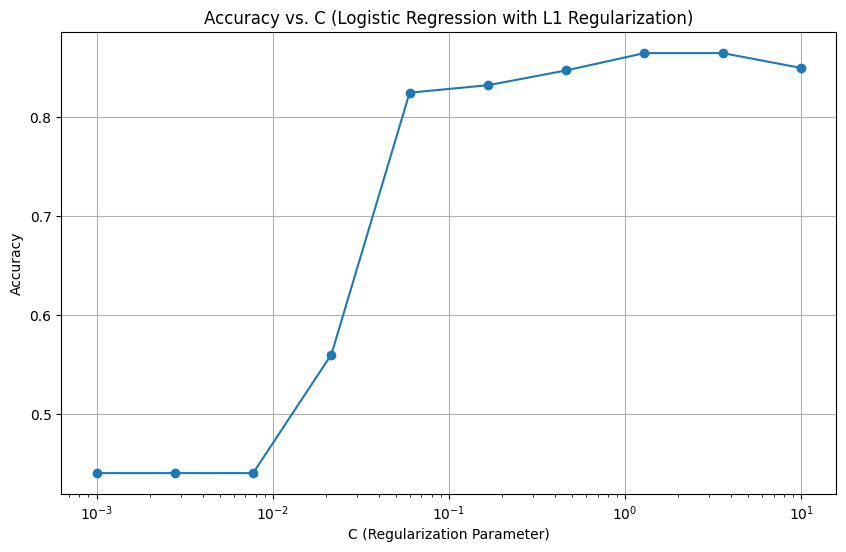

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(sdf['newfeature'], sdf['sent1'], test_size=0.08, random_state=42)

# Assuming X_train_std, X_test_std, y_train, y_test are defined
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming you have a DataFrame called 'sdf' with a 'newfeature' column and a 'sent1' column

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train_tfidf = vectorizer.fit_transform(X_train)

# Transform the testing data using the same vectorizer
X_test_tfidf = vectorizer.transform(X_test)

# Range of C values to try
C_values = np.logspace(-3, 1, 10)

# Store accuracies for each C value
accuracies = []

for C_val in C_values:
    # Create a logistic regression model with L1 regularization
    logreg = LogisticRegression(penalty='l1', C=C_val, solver='liblinear')
    
    # Fit the model on the training data
    logreg.fit(X_train_tfidf, y_train)
    
    # Predict on the testing data
    predictions = logreg.predict(X_test_tfidf)
    
    # Evaluate the accuracy and store it
    accuracy = accuracy_score(y_test, predictions)
    print(f"C = {C_val:.5f}, Accuracy = {accuracy:.4f}")
    accuracies.append(accuracy)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(C_values, accuracies, marker='o')
plt.xscale('log')  # Use a logarithmic scale for better visualization
plt.title('Accuracy vs. C (Logistic Regression with L1 Regularization)')
plt.xlabel('C (Regularization Parameter)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


In [66]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score

C_values = np.logspace(-3, -0.1, 4)

logreg_cv = LogisticRegressionCV(Cs=C_values, cv=4, penalty='l2', solver='liblinear')

# Fit the model on the training data
logreg_cv.fit(X_train, y_train)

# Print the chosen C value (the best regularization parameter)
print("Chosen C value:", logreg_cv.C_[0])

# Predict on the testing data
predictions = logreg_cv.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Plot the cross-validated scores
plt.figure(figsize=(10, 6))
plt.plot(logreg_cv.Cs_, np.mean(logreg_cv.scores_[1], axis=0), marker='o')
plt.xscale('log')  # Use a logarithmic scale for better visualization
plt.title('Cross-validated Accuracy vs. C (Logistic Regression with L2 Regularization)')
plt.xlabel('C (Regularization Parameter)')
plt.ylabel('Cross-validated Accuracy')
plt.grid(True)
plt.show()


Chosen C value: 0.7943282347242815
Accuracy: 0.8985458333333334


KeyError: 1

<Figure size 1000x600 with 0 Axes>